In [ ]:
import torch
from torch import nn, optim
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

In [ ]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Hyperparameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 100
learning_rate = 0.000075
num_epochs = 200
num_test_samples = 16

In [ ]:
# Data loading and preprocessing
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize((.5, .5, .5), (.5, .5, .5))
])

cifar10_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)
data_loader = torch.utils.data.DataLoader(cifar10_dataset, batch_size=batch_size, shuffle=True)

100%|██████████| 170498071/170498071 [00:03<00:00, 49053226.19it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
# Discriminator model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 128, kernel_size=4, stride=2, padding=1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1024, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(1024),
            nn.LeakyReLU(0.2, inplace=True)
        )
        self.output = nn.Sequential(
            nn.Linear(1024*4*4, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), 1024*4*4)
        x = self.output(x)
        return x


In [ ]:
# Generator model
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.linear = nn.Linear(100, 1024*4*4)
        self.deconv = nn.Sequential(
            nn.ConvTranspose2d(1024, 512, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128, 3, kernel_size=4, stride=2, padding=1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.linear(x)
        x = x.view(x.size(0), 1024, 4, 4)
        x = self.deconv(x)
        return x

In [ ]:
# Initialize generator and discriminator
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Weight initialization
def weights_init(module):
    if isinstance(module, (nn.Conv2d, nn.ConvTranspose2d)):
        nn.init.normal_(module.weight.data, 0.0, 0.02)
    elif isinstance(module, nn.BatchNorm2d):
        nn.init.normal_(module.weight.data, 1.0, 0.02)
        nn.init.constant_(module.bias.data, 0)

Epoch [1/200], Discriminator Loss: 0.1666, Generator Loss: 5.5667


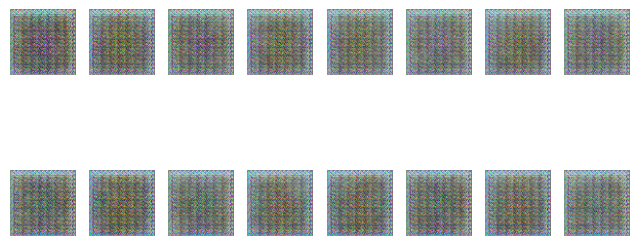

Epoch [2/200], Discriminator Loss: 0.2014, Generator Loss: 6.9684
Epoch [3/200], Discriminator Loss: 0.0948, Generator Loss: 7.0529


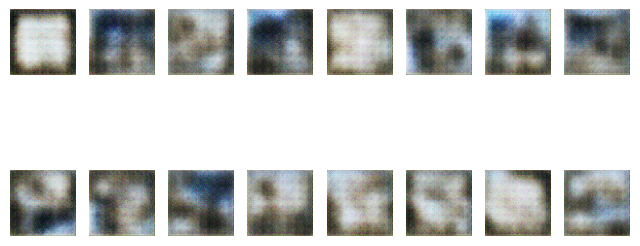

Epoch [4/200], Discriminator Loss: 0.6087, Generator Loss: 4.4813
Epoch [5/200], Discriminator Loss: 0.4415, Generator Loss: 4.3266
Epoch [6/200], Discriminator Loss: 0.3458, Generator Loss: 4.2648


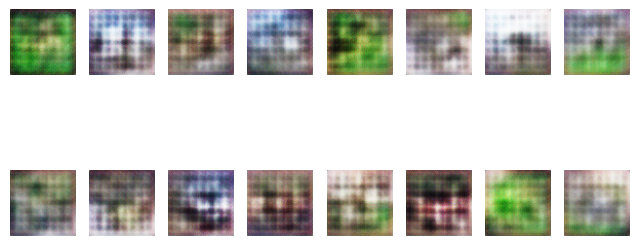

Epoch [7/200], Discriminator Loss: 0.5252, Generator Loss: 4.3646
Epoch [8/200], Discriminator Loss: 0.4544, Generator Loss: 3.1196
Epoch [9/200], Discriminator Loss: 0.4773, Generator Loss: 3.4711


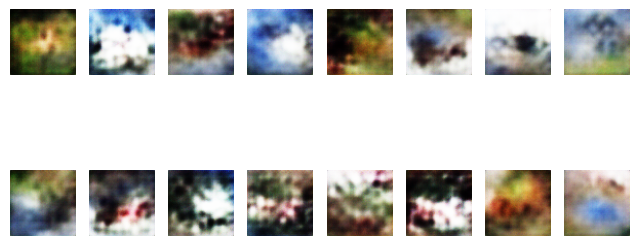

Epoch [10/200], Discriminator Loss: 0.4335, Generator Loss: 3.4235
Epoch [11/200], Discriminator Loss: 0.5686, Generator Loss: 3.4926
Epoch [12/200], Discriminator Loss: 0.4939, Generator Loss: 3.3519


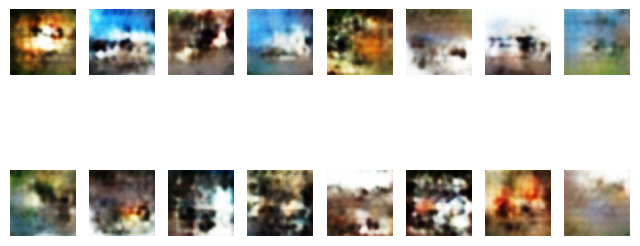

Epoch [13/200], Discriminator Loss: 0.5496, Generator Loss: 3.1227
Epoch [14/200], Discriminator Loss: 0.5444, Generator Loss: 2.9600
Epoch [15/200], Discriminator Loss: 0.7003, Generator Loss: 2.8097


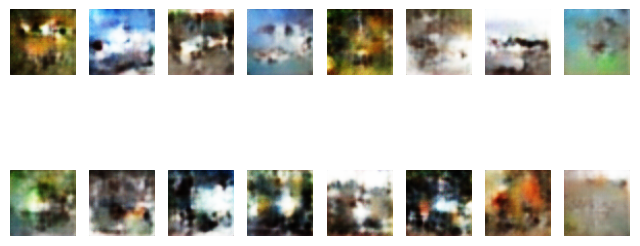

Epoch [16/200], Discriminator Loss: 0.5467, Generator Loss: 2.9053
Epoch [17/200], Discriminator Loss: 0.3251, Generator Loss: 3.1127
Epoch [18/200], Discriminator Loss: 0.7061, Generator Loss: 2.9378


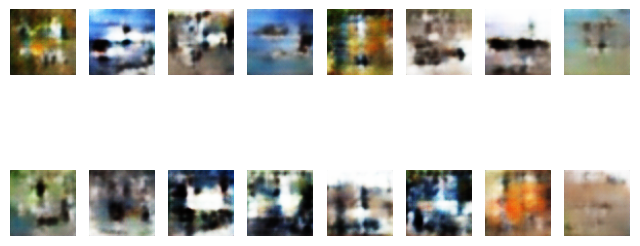

Epoch [19/200], Discriminator Loss: 0.4960, Generator Loss: 3.1482
Epoch [20/200], Discriminator Loss: 0.5289, Generator Loss: 3.2956
Epoch [21/200], Discriminator Loss: 0.5081, Generator Loss: 3.2491


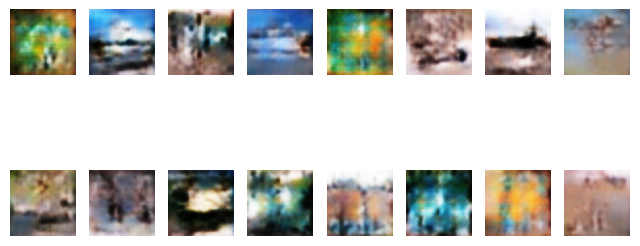

Epoch [22/200], Discriminator Loss: 0.5217, Generator Loss: 3.1643
Epoch [23/200], Discriminator Loss: 0.3969, Generator Loss: 3.0581
Epoch [24/200], Discriminator Loss: 0.4713, Generator Loss: 3.1988


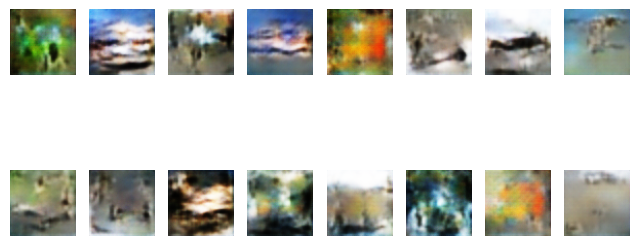

Epoch [25/200], Discriminator Loss: 0.4906, Generator Loss: 3.0607
Epoch [26/200], Discriminator Loss: 0.5543, Generator Loss: 2.9967
Epoch [27/200], Discriminator Loss: 0.4779, Generator Loss: 3.1299


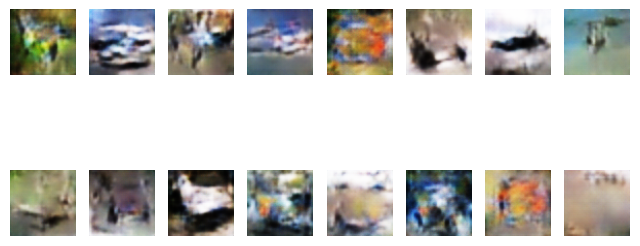

Epoch [28/200], Discriminator Loss: 0.5561, Generator Loss: 2.9533
Epoch [29/200], Discriminator Loss: 0.4793, Generator Loss: 3.0896
Epoch [30/200], Discriminator Loss: 0.5293, Generator Loss: 3.0393


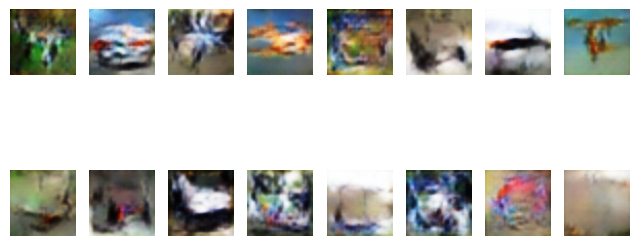

Epoch [31/200], Discriminator Loss: 0.5207, Generator Loss: 2.9829
Epoch [32/200], Discriminator Loss: 0.4273, Generator Loss: 3.1575
Epoch [33/200], Discriminator Loss: 0.1731, Generator Loss: 3.2629


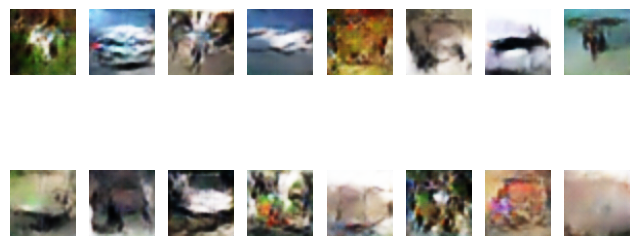

Epoch [34/200], Discriminator Loss: 1.0623, Generator Loss: 2.4493
Epoch [35/200], Discriminator Loss: 0.3861, Generator Loss: 3.0022
Epoch [36/200], Discriminator Loss: 0.5914, Generator Loss: 3.2015


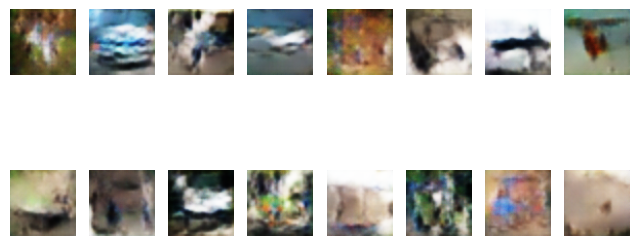

Epoch [37/200], Discriminator Loss: 0.1785, Generator Loss: 3.2836
Epoch [38/200], Discriminator Loss: 0.4850, Generator Loss: 3.2614
Epoch [39/200], Discriminator Loss: 0.6936, Generator Loss: 3.4056


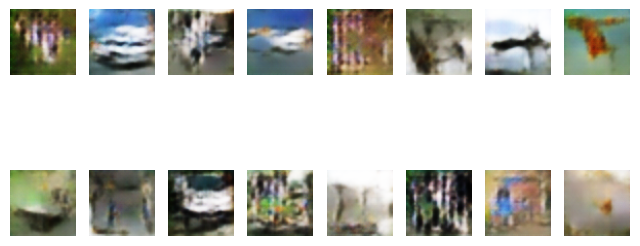

Epoch [40/200], Discriminator Loss: 0.2670, Generator Loss: 3.2081
Epoch [41/200], Discriminator Loss: 0.1013, Generator Loss: 3.7397
Epoch [42/200], Discriminator Loss: 0.0922, Generator Loss: 4.0300


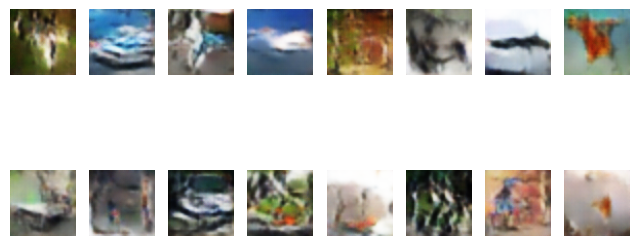

Epoch [43/200], Discriminator Loss: 0.6767, Generator Loss: 3.5314
Epoch [44/200], Discriminator Loss: 0.6915, Generator Loss: 3.0417
Epoch [45/200], Discriminator Loss: 0.1508, Generator Loss: 3.6148


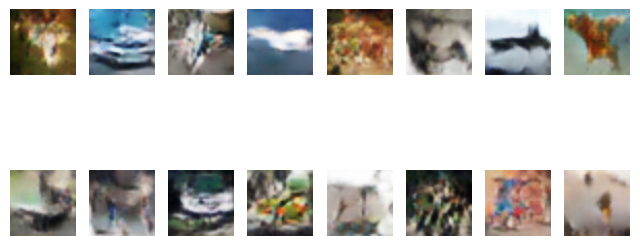

Epoch [46/200], Discriminator Loss: 0.2478, Generator Loss: 4.0727
Epoch [47/200], Discriminator Loss: 1.0488, Generator Loss: 2.1619
Epoch [48/200], Discriminator Loss: 0.4837, Generator Loss: 3.1065


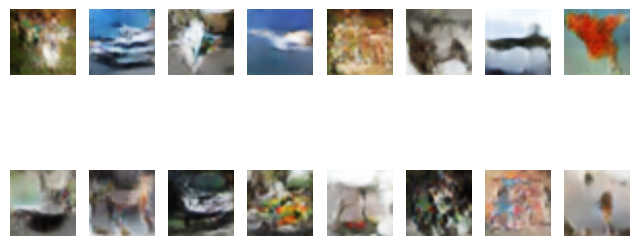

Epoch [49/200], Discriminator Loss: 0.5895, Generator Loss: 3.2055
Epoch [50/200], Discriminator Loss: 0.3467, Generator Loss: 3.7455
Epoch [51/200], Discriminator Loss: 0.2503, Generator Loss: 3.9284


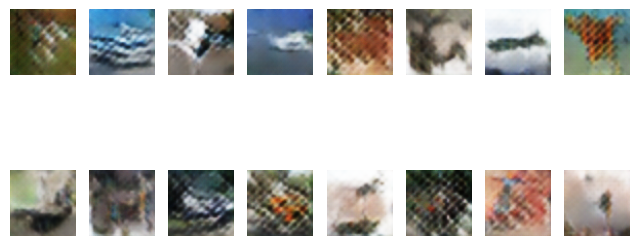

Epoch [52/200], Discriminator Loss: 0.4775, Generator Loss: 3.5352
Epoch [53/200], Discriminator Loss: 0.0950, Generator Loss: 4.0887
Epoch [54/200], Discriminator Loss: 0.3751, Generator Loss: 3.9502


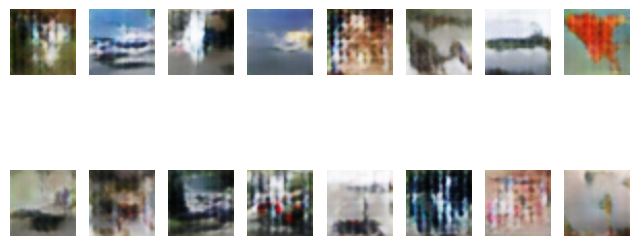

Epoch [55/200], Discriminator Loss: 0.6576, Generator Loss: 3.5782
Epoch [56/200], Discriminator Loss: 0.5026, Generator Loss: 3.6241
Epoch [57/200], Discriminator Loss: 0.1529, Generator Loss: 3.8164


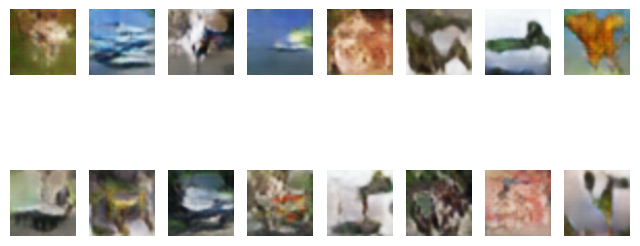

Epoch [58/200], Discriminator Loss: 0.6142, Generator Loss: 3.4557
Epoch [59/200], Discriminator Loss: 0.0807, Generator Loss: 4.2330
Epoch [60/200], Discriminator Loss: 0.4730, Generator Loss: 3.7672


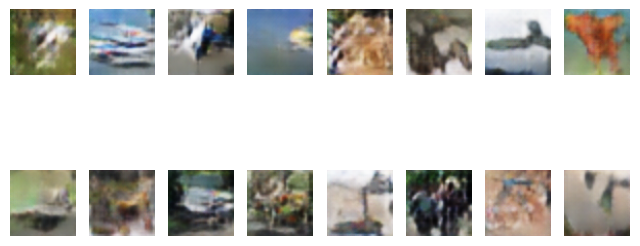

Epoch [61/200], Discriminator Loss: 0.4231, Generator Loss: 3.7593
Epoch [62/200], Discriminator Loss: 0.3253, Generator Loss: 3.6425
Epoch [63/200], Discriminator Loss: 0.0511, Generator Loss: 4.7452


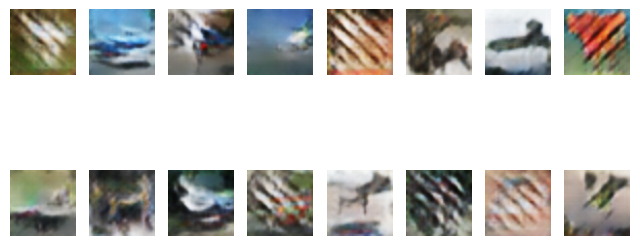

Epoch [64/200], Discriminator Loss: 0.4849, Generator Loss: 3.8525
Epoch [65/200], Discriminator Loss: 0.5337, Generator Loss: 3.4702
Epoch [66/200], Discriminator Loss: 0.4464, Generator Loss: 3.4577


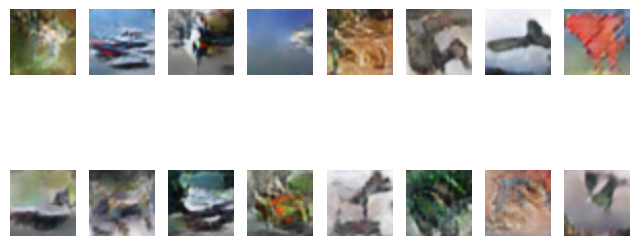

Epoch [67/200], Discriminator Loss: 0.3773, Generator Loss: 3.6449
Epoch [68/200], Discriminator Loss: 0.0554, Generator Loss: 4.6220
Epoch [69/200], Discriminator Loss: 0.3898, Generator Loss: 4.6616


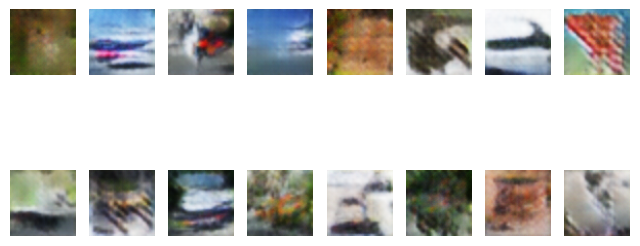

Epoch [70/200], Discriminator Loss: 0.4050, Generator Loss: 3.4046
Epoch [71/200], Discriminator Loss: 0.1302, Generator Loss: 4.3049
Epoch [72/200], Discriminator Loss: 0.9344, Generator Loss: 2.5202


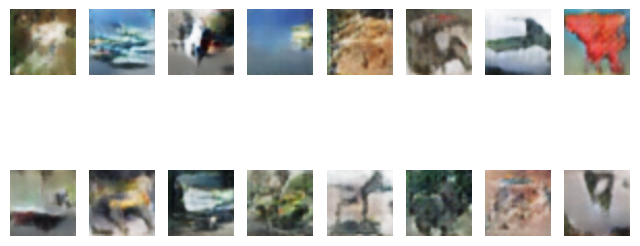

Epoch [73/200], Discriminator Loss: 0.5323, Generator Loss: 3.3355
Epoch [74/200], Discriminator Loss: 0.0629, Generator Loss: 4.5552
Epoch [75/200], Discriminator Loss: 0.0359, Generator Loss: 5.1414


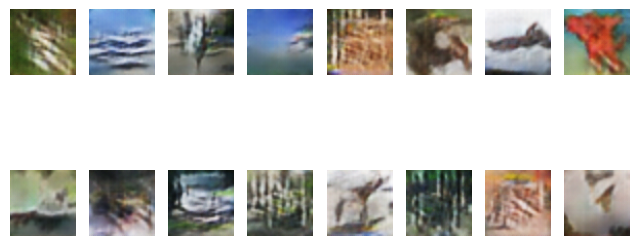

Epoch [76/200], Discriminator Loss: 0.6222, Generator Loss: 3.3384
Epoch [77/200], Discriminator Loss: 0.5839, Generator Loss: 3.3979
Epoch [78/200], Discriminator Loss: 0.5694, Generator Loss: 3.2474


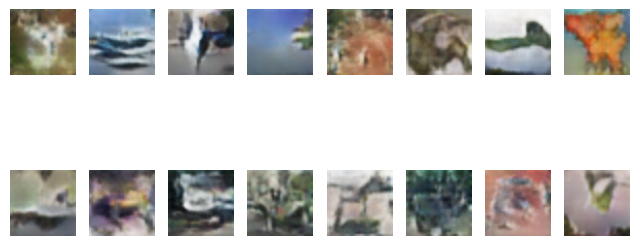

Epoch [79/200], Discriminator Loss: 0.4296, Generator Loss: 3.5186
Epoch [80/200], Discriminator Loss: 0.1753, Generator Loss: 4.4527
Epoch [81/200], Discriminator Loss: 0.1557, Generator Loss: 4.5099


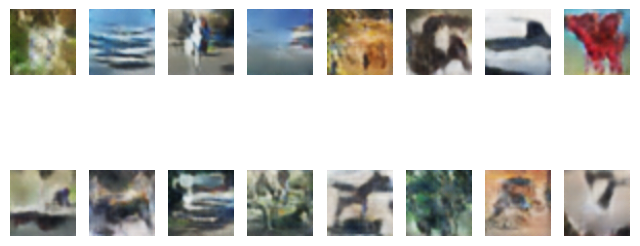

Epoch [82/200], Discriminator Loss: 0.1961, Generator Loss: 4.7992
Epoch [83/200], Discriminator Loss: 0.4999, Generator Loss: 3.3885
Epoch [84/200], Discriminator Loss: 0.5126, Generator Loss: 3.6641


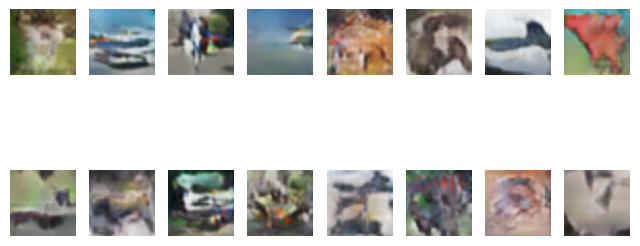

Epoch [85/200], Discriminator Loss: 0.2227, Generator Loss: 4.1918
Epoch [86/200], Discriminator Loss: 0.4881, Generator Loss: 3.3318
Epoch [87/200], Discriminator Loss: 0.4327, Generator Loss: 3.6915


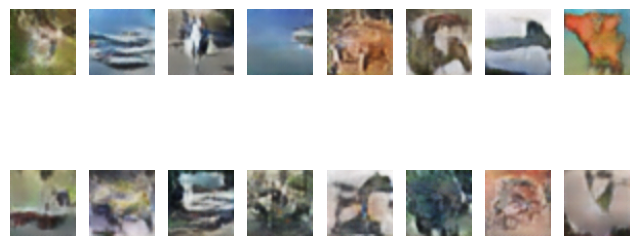

Epoch [88/200], Discriminator Loss: 0.3157, Generator Loss: 3.8332
Epoch [89/200], Discriminator Loss: 0.6480, Generator Loss: 2.8529
Epoch [90/200], Discriminator Loss: 0.0356, Generator Loss: 4.9875


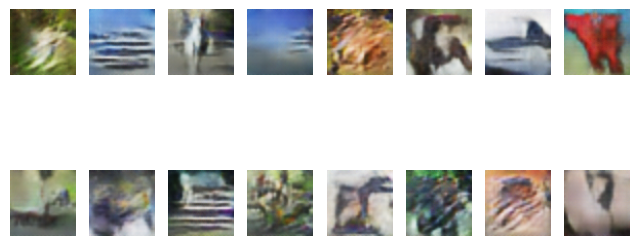

Epoch [91/200], Discriminator Loss: 0.2884, Generator Loss: 4.5243
Epoch [92/200], Discriminator Loss: 0.0340, Generator Loss: 5.3078
Epoch [93/200], Discriminator Loss: 0.3510, Generator Loss: 4.3712


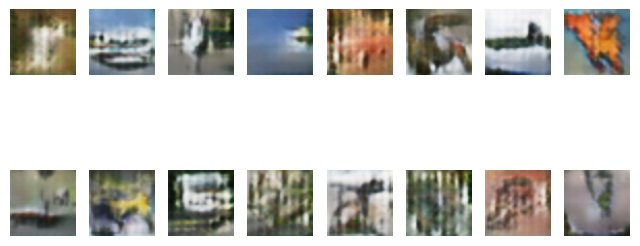

Epoch [94/200], Discriminator Loss: 0.5157, Generator Loss: 4.0020
Epoch [95/200], Discriminator Loss: 0.5784, Generator Loss: 2.8990
Epoch [96/200], Discriminator Loss: 0.0590, Generator Loss: 4.6888


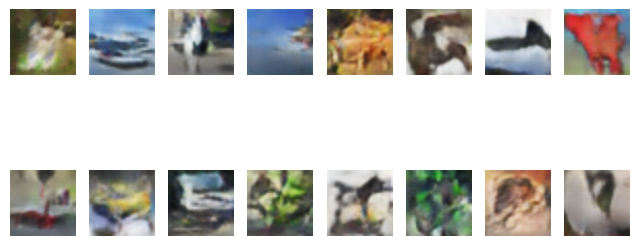

Epoch [97/200], Discriminator Loss: 0.0255, Generator Loss: 5.5547
Epoch [98/200], Discriminator Loss: 0.5067, Generator Loss: 3.3942
Epoch [99/200], Discriminator Loss: 0.5801, Generator Loss: 3.5500


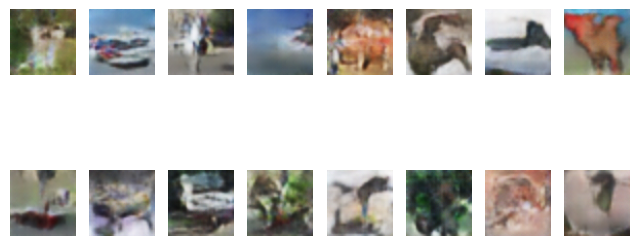

Epoch [100/200], Discriminator Loss: 0.1220, Generator Loss: 3.9034
Epoch [101/200], Discriminator Loss: 0.1905, Generator Loss: 5.3014
Epoch [102/200], Discriminator Loss: 0.7177, Generator Loss: 2.5585


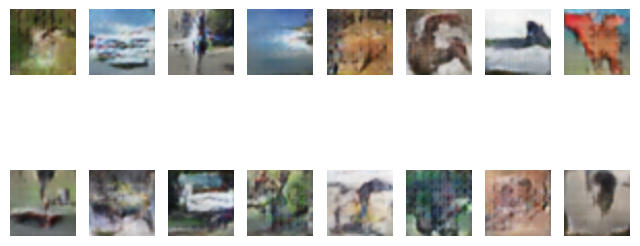

Epoch [103/200], Discriminator Loss: 0.5829, Generator Loss: 3.1676
Epoch [104/200], Discriminator Loss: 0.3692, Generator Loss: 3.5479
Epoch [105/200], Discriminator Loss: 0.5075, Generator Loss: 4.0205


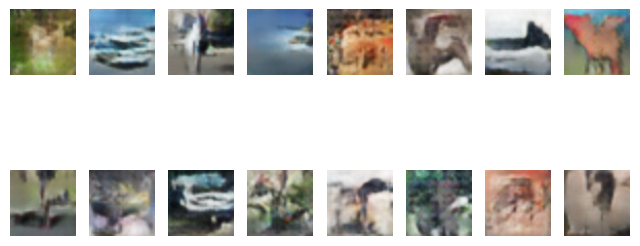

Epoch [106/200], Discriminator Loss: 0.5550, Generator Loss: 3.2899
Epoch [107/200], Discriminator Loss: 0.3087, Generator Loss: 3.6039
Epoch [108/200], Discriminator Loss: 0.0276, Generator Loss: 5.6961


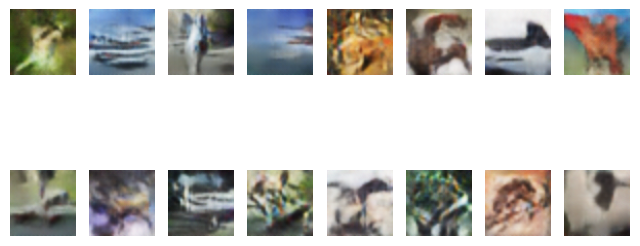

Epoch [109/200], Discriminator Loss: 0.0214, Generator Loss: 5.8580
Epoch [110/200], Discriminator Loss: 0.0178, Generator Loss: 5.9469
Epoch [111/200], Discriminator Loss: 0.1827, Generator Loss: 5.9211


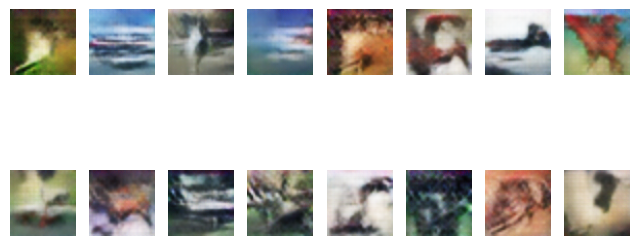

Epoch [112/200], Discriminator Loss: 0.2348, Generator Loss: 4.3573
Epoch [113/200], Discriminator Loss: 0.3180, Generator Loss: 3.9795
Epoch [114/200], Discriminator Loss: 0.0578, Generator Loss: 4.8159


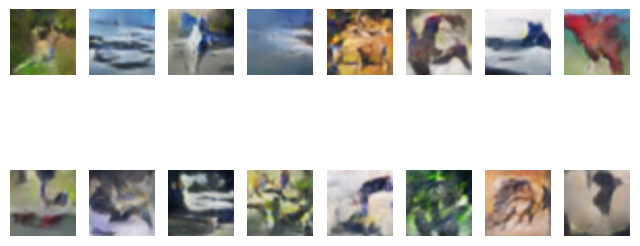

In [ ]:
generator.apply(weights_init)
discriminator.apply(weights_init)

# Loss function
criterion = nn.BCELoss()

# Optimizers
g_optimizer = optim.Adam(generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
d_optimizer = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))

# Fixed noise for visualization
fixed_noise = torch.randn(num_test_samples, 100, device=device)

# Training loop
discriminator_losses = []
generator_losses = []

for epoch in range(num_epochs):
    # Initialize loss variables for this epoch
    epoch_discriminator_loss = 0
    epoch_generator_loss = 0

    for i, (real_images, _) in enumerate(data_loader):
        real_images = real_images.to(device)

        # Discriminator forward pass with real images
        real_labels = torch.ones(batch_size, 1, device=device)
        real_outputs = discriminator(real_images)
        d_loss_real = criterion(real_outputs, real_labels)

        # Generator forward pass and discriminator backward pass with fake images
        noise = torch.randn(batch_size, 100, device=device)
        fake_images = generator(noise)
        fake_labels = torch.zeros(batch_size, 1, device=device)
        fake_outputs = discriminator(fake_images.detach())
        d_loss_fake = criterion(fake_outputs, fake_labels)

        d_loss = d_loss_real + d_loss_fake

        discriminator.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        # Generator forward pass and discriminator backward pass with fake images
        fake_outputs = discriminator(fake_images)
        g_loss = criterion(fake_outputs, real_labels)

        generator.zero_grad()
        g_loss.backward()
        g_optimizer.step()

        # Accumulate losses for this epoch
        epoch_discriminator_loss += d_loss.item()
        epoch_generator_loss += g_loss.item()

    # Average losses for this epoch
    epoch_discriminator_loss /= len(data_loader)
    epoch_generator_loss /= len(data_loader)

    discriminator_losses.append(epoch_discriminator_loss)
    generator_losses.append(epoch_generator_loss)

    # Print progress
    print(f"Epoch [{epoch+1}/{num_epochs}], Discriminator Loss: {epoch_discriminator_loss:.4f}, Generator Loss: {epoch_generator_loss:.4f}")

    # Generate images
    with torch.no_grad():
        generated_images = generator(fixed_noise).detach().cpu()

    # Display generated images
    if (epoch+1) % 3 == 0 or epoch == 0:
        plt.figure(figsize=(8, 8))
        for j in range(num_test_samples):
            # Denormalize the image
            image = generated_images[j].permute(1, 2, 0)
            image = (image + 1) / 2  # Undo normalization

            plt.subplot(4, 8, j+1)
            plt.imshow(image)
            plt.axis('off')
        plt.show()

# Plotting the loss curve
plt.figure()
plt.plot(range(1, num_epochs+1), discriminator_losses, label="Discriminator Loss")
plt.plot(range(1, num_epochs+1), generator_losses, label="Generator Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig("loss_curve.png")
plt.show()